## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import binom
from scipy.special import gamma

In [2]:
data = pd.DataFrame(columns=["Date", "Remain", "Leave", "Undecided", "Sample Size"])

In [3]:
dates = ["01/06/2014", "29/06/2014", "23/11/2014", "05/05/2015", "31/05/2015",  "28/09/2015", "13/12/2015",
         "24/01/2016", "14/02/2016", "22/02/2016", "20/03/2016", "10/04/2016", "19/04/2016", "17/05/2016",
         "13/06/2016", "22/06/2016"]
Remain_data = [.4, .36, .32, .56, .58, .55, .56, .54, .49, .51, .48, .45, .51, .52, .46, .54]
Leave_data = [.42, .43, .48, .34, .31, .36, .35, .36, .41, .39, .41, .38, .4, .41, .45, .46]
Undecided_data = [.18, .21, .20, .10, .11, .08, .08, .1, .1, .1, .11, .17, .09, .07, .09, 0]
Sample_size_data = [2062, 2049, 2049, 1011, 500, 1009, 1001, 1006, 1105, 1000, 1002, 1002, 1002, 1000, 1002, 1032]

In [4]:
data["Date"] = dates
data["Remain"] = Remain_data
data["Leave"] = Leave_data
data["Undecided"] = Undecided_data
data["Sample Size"] = Sample_size_data

In [5]:
data.set_index("Date", drop=True, inplace=True)
data.index = pd.to_datetime(data.index)

In [6]:
data["Remain Sample"] = data["Remain"] * data["Sample Size"]
data["Leave Sample"] = data["Leave"] * data["Sample Size"]
data["Total"] = data["Remain Sample"] + data["Leave Sample"]

In [7]:
data

,Remain,Leave,Undecided,Sample Size,Remain Sample,Leave Sample,Total
Date,,,,,,,
2014-01-06,0.40,0.42,0.18,2062,824.80,866.04,1690.84
2014-06-29,0.36,0.43,0.21,2049,737.64,881.07,1618.71
2014-11-23,0.32,0.48,0.20,2049,655.68,983.52,1639.20
2015-05-05,0.56,0.34,0.10,1011,566.16,343.74,909.90
2015-05-31,0.58,0.31,0.11,500,290.00,155.00,445.00
2015-09-28,0.55,0.36,0.08,1009,554.95,363.24,918.19
2015-12-13,0.56,0.35,0.08,1001,560.56,350.35,910.91
2016-01-24,0.54,0.36,0.10,1006,543.24,362.16,905.40
2016-02-14,0.49,0.41,0.10,1105,541.45,453.05,994.50


In [8]:
data["Remain"] = data["Remain Sample"] / data["Total"]
data["Leave"] = data["Leave Sample"] / data["Total"]

In [9]:
data

,Remain,Leave,Undecided,Sample Size,Remain Sample,Leave Sample,Total
Date,,,,,,,
2014-01-06,0.487805,0.512195,0.18,2062,824.80,866.04,1690.84
2014-06-29,0.455696,0.544304,0.21,2049,737.64,881.07,1618.71
2014-11-23,0.400000,0.600000,0.20,2049,655.68,983.52,1639.20
2015-05-05,0.622222,0.377778,0.10,1011,566.16,343.74,909.90
2015-05-31,0.651685,0.348315,0.11,500,290.00,155.00,445.00
2015-09-28,0.604396,0.395604,0.08,1009,554.95,363.24,918.19
2015-12-13,0.615385,0.384615,0.08,1001,560.56,350.35,910.91
2016-01-24,0.600000,0.400000,0.10,1006,543.24,362.16,905.40
2016-02-14,0.544444,0.455556,0.10,1105,541.45,453.05,994.50


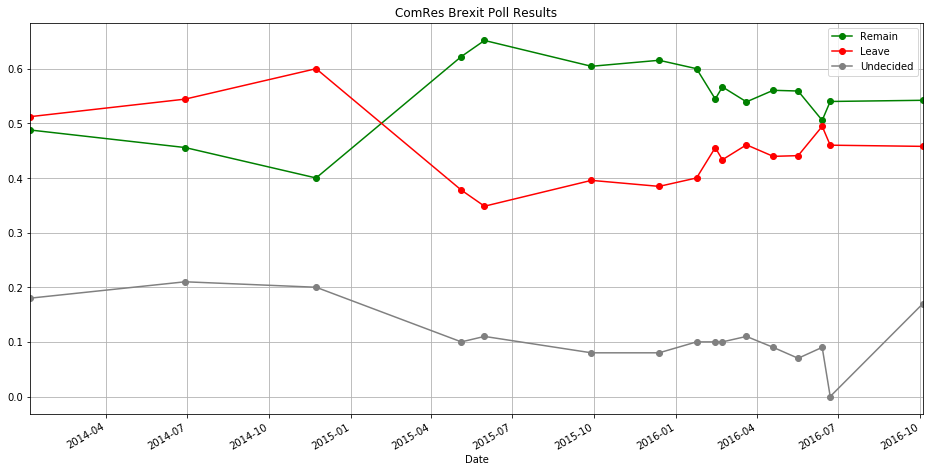

In [10]:
data[["Remain", "Leave", "Undecided"]].plot(figsize=(16, 8), marker='o',
                                            grid=True, color=['green', 'red', 'gray'],
                                           title="ComRes Brexit Poll Results")
plt.show()

## Prior

$f(Brexit) \propto B^{7200} (1-B)^{15408}$

In [28]:
prior_a = int(sum(data["Leave Sample"][0:-1]))
prior_b = int(sum(data["Total"][0:-1]))

In [16]:
prior_a = data["Leave"][0:-1].mean()
prior_b = data["Remain"][0:-1].mean()
prior_a = 8
prior_b = 1

In [17]:
prior = beta(prior_a, prior_b)

## Likelihood

$f(poll~data | Brexit) \propto B^{433} (1-B)^{1032}$

In [18]:
likelihood_a = int(data["Leave Sample"][-1])
likelihood_b = int(data["Total"][-1])

In [19]:
likelihood = binom(int(data["Total"][-1]), data["Leave"][-1])

In [20]:
likelihood_v = [likelihood.pmf(x) for x in np.arange(1, int(data["Total"][-1]))]

In [21]:
likelihood_norm = [(x - np.min(likelihood_v)) / (np.max(likelihood_v) - np.min(likelihood_v)) for x in likelihood_v]

## Posterior

$f(Brexit | poll~data) \propto B^{7633} (1-B)^{16336}$

In [22]:
posterior_a = prior_a + likelihood_a

In [23]:
posterior_b = prior_b + likelihood_b

In [24]:
posterior = beta(posterior_a, posterior_b)

### 95% Credible Interval

In [25]:
var = (posterior_a * posterior_b)/((posterior_a * posterior_b)**2 * (posterior_a + posterior_b+1))
std = np.sqrt(var)
mean = posterior_a/(posterior_a + posterior_b)
conf_l = mean -1.96* std
conf_u = mean + 1.96 * std
(conf_l, conf_u)

(0.3180804752331262, 0.31822315512991006)

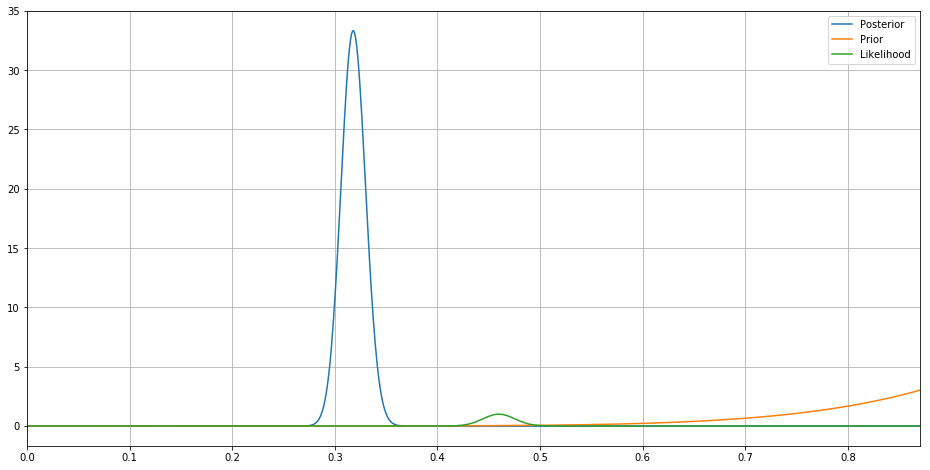

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.plot(np.linspace(0, 1, 1000), [posterior.pdf(x) for x in np.linspace(0, 1, 1000)])
ax.plot(np.linspace(0, 1, 1000), [prior.pdf(x) for x in np.linspace(0, 1, 1000)])
ax.plot(np.linspace(0, 1, int(data["Total"][-1])-1), likelihood_norm)
#ax.vlines(.5, 0, 100)
ax.legend(["Posterior", "Prior", "Likelihood"])
ax.set_xlim([0.0, .87])
plt.grid()

In [ ]:
plt.plot()